In [1]:
import Bio.Align.Applications
dir(Bio.Align.Applications)

['ClustalOmegaCommandline',
 'ClustalwCommandline',
 'DialignCommandline',
 'MSAProbsCommandline',
 'MafftCommandline',
 'MuscleCommandline',
 'PrankCommandline',
 'ProbconsCommandline',
 'TCoffeeCommandline',
 '_ClustalOmega',
 '_Clustalw',
 '_Dialign',
 '_MSAProbs',
 '_Mafft',
 '_Muscle',
 '_Prank',
 '_Probcons',
 '_TCoffee',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__']

In [2]:
from Bio.Align.Applications import ClustalwCommandline
help(ClustalwCommandline)

Help on class ClustalwCommandline in module Bio.Align.Applications._Clustalw:

class ClustalwCommandline(Bio.Application.AbstractCommandline)
 |  ClustalwCommandline(cmd='clustalw', **kwargs)
 |  
 |  Command line wrapper for clustalw (version one or two).
 |  
 |  http://www.clustal.org/
 |  
 |  Notes
 |  -----
 |  Last checked against versions: 1.83 and 2.1
 |  
 |  References
 |  ----------
 |  Larkin MA, Blackshields G, Brown NP, Chenna R, McGettigan PA,
 |  McWilliam H, Valentin F, Wallace IM, Wilm A, Lopez R, Thompson JD,
 |  Gibson TJ, Higgins DG. (2007). Clustal W and Clustal X version 2.0.
 |  Bioinformatics, 23, 2947-2948.
 |  
 |  Examples
 |  --------
 |  >>> from Bio.Align.Applications import ClustalwCommandline
 |  >>> in_file = "unaligned.fasta"
 |  >>> clustalw_cline = ClustalwCommandline("clustalw2", infile=in_file)
 |  >>> print(clustalw_cline)
 |  clustalw2 -infile=unaligned.fasta
 |  
 |  You would typically run the command line with clustalw_cline() or via
 |  the

<h2>ClustalW</h2>

In [7]:
from Bio.Align.Applications import ClustalwCommandline
in_file = "ClustalWADHDGenome.fasta"
# parsing DNA file (Unaligned)
clustalw_cline = ClustalwCommandline("clustalw2", infile= in_file)
#performing the alignment
# printing the output
print(clustalw_cline)

clustalw2 -infile=ClustalWADHDGenome.fasta


In [9]:
import os
clustalw_exe = r"C:\Program Files (x86)\ClustalW2\clustalw2.exe"
clustalw_cline = ClustalwCommandline(clustalw_exe, infile = "ClustalWADHDGenome.fasta")
assert os.path.isfile(clustalw_exe), "Clustal_W executable is missing or not found"
stdout, stderr = clustalw_cline()
print(clustalw_cline)

"C:\Program Files (x86)\ClustalW2\clustalw2.exe" -infile=ClustalWADHDGenome.fasta


In [10]:
from Bio import AlignIO
align = AlignIO.read("ClustalWADHDGenome.aln", "clustal")
print(align)

Alignment with 10 rows and 2368 columns
GCATTGCTCTTCAGCACCAGAGTTCTGGACAGCGCCCCAAGCAG...GTT XM_003259553.2_1-2365
GCATTGCTCTTCAGCACCAGAGTTCTGGACAGCGCCCCAAGCAG...GTT XM_032171661.1_1-2365
GCATTGCTCTTCAGCACCAGGGTTCTGGACAGCGCCCCAAGCAG...GTT NM_173353.4_1-2360
-CATTGCTCTTCAGCACCAGGGTTCTGGACAGCGCCCCAAGCAG...GTT AY098914.1_1-2349
GCATTGCTCTTCAGCACCAGGGTTTTGGACAGCGCCCCAAGCAG...GTT XM_003832903.3_110-2470
GCATTGCTCTTCAGCACCAGGGTTTTGGACAGCGCCCCAAGCAG...GTT XM_522470.5_2070-4430
GCATTGCTCTTCAGCACCAGGGTTCTGGACAGCGCCCCAAGCAG...GTT XM_004053578.2_1-2349
-CATTACTCTTCAGCACCAGGGTTCTGGACAGCGCCGCAAGCAG...GTT XM_002823521.2_1-2360
-CATTGCTCTTCAGCACCAGTGTTCTGGACAGCGCCCCAAGCAG...--- XM_011727152.2_65-2419
-CATTGCTCTTCAGCACCAGGGTTCTGGACAGCGCCCCAAGCAG...G-- XM_023226566.1_1-2358


In [11]:
from Bio import Phylo
tree = Phylo.read("ClustalWADHDGenome.dnd", "newick")
Phylo.draw_ascii(tree)

          , NM_173353.4_1-2360
     _____|
    |     | AY098914.1_1-2349
  __|
 |  |       _____________ XM_002823521.2_1-2360
 |  |      |
 |  |______|             ___ XM_003259553.2_1-2365
 |         |____________|
 |         |            |_______ XM_032171661.1_1-2365
 |         |
 |         |                              __________ XM_011727152.2_65-2419
 |         |_____________________________|
 |                                       |___________ XM_023226566.1_1-2358
_|
 |_______ XM_004053578.2_1-2349
 |
 | XM_003832903.3_110-2470
 |
 | XM_522470.5_2070-4430



In [12]:
from Bio.Phylo.TreeConstruction import DistanceCalculator

#calculate the distance matrix
calculator = DistanceCalculator('identity')
#adds distance matrix to the calculator object and returns it
dm = calculator.get_distance(align)
print(dm)

XM_003259553.2_1-2365	0
XM_032171661.1_1-2365	0.007179054054054057	0
NM_173353.4_1-2360	0.020692567567567544	0.022804054054054057	0
AY098914.1_1-2349	0.02533783783783783	0.027449324324324342	0.004645270270270285	0
XM_003832903.3_110-2470	0.019425675675675658	0.02153716216216217	0.0063344594594594295	0.010979729729729715	0
XM_522470.5_2070-4430	0.019425675675675658	0.02153716216216217	0.0063344594594594295	0.010979729729729715	0.0008445945945946276	0
XM_004053578.2_1-2349	0.026182432432432456	0.028716216216216228	0.013513513513513487	0.018158783783783772	0.010557432432432456	0.010557432432432456	0
XM_002823521.2_1-2360	0.021114864864864913	0.024070945945945943	0.017736486486486513	0.021114864864864913	0.016469594594594628	0.016469594594594628	0.023226351351351315	0
XM_011727152.2_65-2419	0.0401182432432432	0.041807432432432456	0.03758445945945943	0.04138513513513509	0.03505067567567566	0.03505067567567566	0.04138513513513509	0.03673986486486491	0
XM_023226566.1_1-2358	0.0396959459459459

In [14]:
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor

#initialize a DistanceTreeConstructor object based on our distance calculator object
constructor = DistanceTreeConstructor(calculator)

#build the tree
upgma_tree = constructor.build_tree(align)

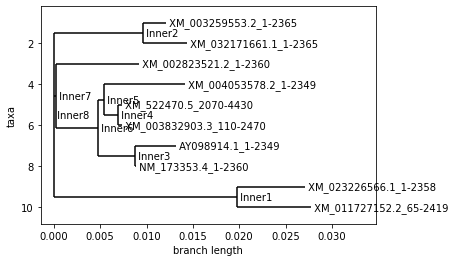

In [15]:
from Bio import Phylo
import pylab
#draw the tree
Phylo.draw(upgma_tree)

<h2>MUSCLE</h2>

In [32]:
from Bio.Align.Applications import MuscleCommandline
muscle_cline = MuscleCommandline(input="MuscleADHDGenome.fasta")
print(muscle_cline)

muscle -in MuscleADHDGenome.fasta


In [35]:
from Bio.Align.Applications import MuscleCommandline
cline = MuscleCommandline(input="MuscleADHDGenome.fasta", out="MuscleADHDGenome.txt")
print(cline)


muscle -in MuscleADHDGenome.fasta -out MuscleADHDGenome.txt


In [37]:
from Bio.Align.Applications import MuscleCommandline
from Bio import AlignIO
musclealign = AlignIO.read("MuscleADHDGenome.aln", "clustal")
print(musclealign)

Alignment with 10 rows and 2368 columns
GCATTGCTCTTCAGCACCAGAGTTCTGGACAGCGCCCCAAGCAG...GTT XM_003259553.2_1-2365
GCATTGCTCTTCAGCACCAGAGTTCTGGACAGCGCCCCAAGCAG...GTT XM_032171661.1_1-2365
GCATTGCTCTTCAGCACCAGGGTTCTGGACAGCGCCCCAAGCAG...GTT NM_173353.4_1-2360
-CATTGCTCTTCAGCACCAGGGTTCTGGACAGCGCCCCAAGCAG...GTT AY098914.1_1-2349
GCATTGCTCTTCAGCACCAGGGTTTTGGACAGCGCCCCAAGCAG...GTT XM_003832903.3_110-2470
GCATTGCTCTTCAGCACCAGGGTTTTGGACAGCGCCCCAAGCAG...GTT XM_522470.5_2070-4430
GCATTGCTCTTCAGCACCAGGGTTCTGGACAGCGCCCCAAGCAG...GTT XM_004053578.2_1-2349
-CATTACTCTTCAGCACCAGGGTTCTGGACAGCGCCGCAAGCAG...GTT XM_002823521.2_1-2360
-CATTGCTCTTCAGCACCAGTGTTCTGGACAGCGCCCCAAGCAG...--- XM_011727152.2_65-2419
-CATTGCTCTTCAGCACCAGGGTTCTGGACAGCGCCCCAAGCAG...G-- XM_023226566.1_1-2358


In [38]:
from Bio import Phylo
tree = Phylo.read("MuscleADHDGenome.dnd", "newick")
Phylo.draw_ascii(tree)

          , NM_173353.4_1-2360
     _____|
    |     | AY098914.1_1-2349
  __|
 |  |       _____________ XM_002823521.2_1-2360
 |  |      |
 |  |______|             ___ XM_003259553.2_1-2365
 |         |____________|
 |         |            |_______ XM_032171661.1_1-2365
 |         |
 |         |                              __________ XM_011727152.2_65-2419
 |         |_____________________________|
 |                                       |___________ XM_023226566.1_1-2358
_|
 |_______ XM_004053578.2_1-2349
 |
 | XM_003832903.3_110-2470
 |
 | XM_522470.5_2070-4430



In [39]:
from Bio.Phylo.TreeConstruction import DistanceCalculator

#calculate the distance matrix
calculator = DistanceCalculator('identity')
#adds distance matrix to the calculator object and returns it
dm = calculator.get_distance(musclealign)
print(dm)

XM_003259553.2_1-2365	0
XM_032171661.1_1-2365	0.007179054054054057	0
NM_173353.4_1-2360	0.020692567567567544	0.022804054054054057	0
AY098914.1_1-2349	0.02533783783783783	0.027449324324324342	0.004645270270270285	0
XM_003832903.3_110-2470	0.019425675675675658	0.02153716216216217	0.0063344594594594295	0.010979729729729715	0
XM_522470.5_2070-4430	0.019425675675675658	0.02153716216216217	0.0063344594594594295	0.010979729729729715	0.0008445945945946276	0
XM_004053578.2_1-2349	0.026182432432432456	0.028716216216216228	0.013513513513513487	0.018158783783783772	0.010557432432432456	0.010557432432432456	0
XM_002823521.2_1-2360	0.021114864864864913	0.024070945945945943	0.017736486486486513	0.021114864864864913	0.016469594594594628	0.016469594594594628	0.023226351351351315	0
XM_011727152.2_65-2419	0.0401182432432432	0.041807432432432456	0.03758445945945943	0.04138513513513509	0.03505067567567566	0.03505067567567566	0.04138513513513509	0.03673986486486491	0
XM_023226566.1_1-2358	0.0396959459459459

In [47]:
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor

#initialize a DistanceTreeConstructor object based on our distance calculator object
constructor = DistanceTreeConstructor(calculator)

#build the tree
upgma_tree = constructor.build_tree(musclealign)

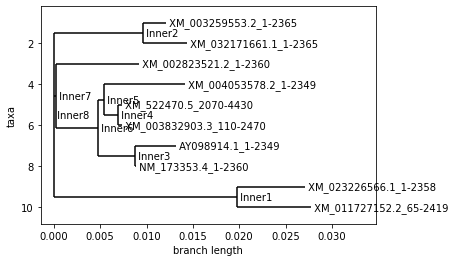

In [48]:
from Bio import Phylo
import pylab
#draw the tree
Phylo.draw(upgma_tree2)

<h2>TCoffee</h2>

In [22]:
from Bio.Align.Applications import TCoffeeCommandline
tcoffee_cline = TCoffeeCommandline(infile="TCoffeeADHDGenome.fasta",
                                   output="clustalw",
                                   outfile="TCoffeeADHDGenome.aln")
print(tcoffee_cline)

t_coffee -output clustalw -infile TCoffeeADHDGenome.fasta -outfile TCoffeeADHDGenome.aln


In [23]:
from Bio.Align.Applications import TCoffeeCommandline
from Bio import AlignIO
TCoffeeAlign = AlignIO.read("TCoffeeADHDGenome.aln", "clustal")
print(TCoffeeAlign)

Alignment with 10 rows and 2368 columns
GCATTGCTCTTCAGCACCAGGGTTCTGGACAGCGCCCCAAGCAG...GTT NM_173353.4_1-2360
-CATTGCTCTTCAGCACCAGGGTTCTGGACAGCGCCCCAAGCAG...GTT AY098914.1_1-2349
GCATTGCTCTTCAGCACCAGGGTTTTGGACAGCGCCCCAAGCAG...GTT XM_003832903.3_110-2470
GCATTGCTCTTCAGCACCAGGGTTTTGGACAGCGCCCCAAGCAG...GTT XM_522470.5_2070-4430
GCATTGCTCTTCAGCACCAGGGTTCTGGACAGCGCCCCAAGCAG...GTT XM_004053578.2_1-2349
-CATTACTCTTCAGCACCAGGGTTCTGGACAGCGCCGCAAGCAG...GTT XM_002823521.2_1-2360
GCATTGCTCTTCAGCACCAGAGTTCTGGACAGCGCCCCAAGCAG...GTT XM_003259553.2_1-2365
GCATTGCTCTTCAGCACCAGAGTTCTGGACAGCGCCCCAAGCAG...GTT XM_032171661.1_1-2365
-CATTGCTCTTCAGCACCAGTGTTCTGGACAGCGCCCCAAGCAG...--C XM_011727152.2_65-2419
-CATTGCTCTTCAGCACCAGGGTTCTGGACAGCGCCCCAAGCAG...--G XM_023226566.1_1-2358


In [24]:
# Generate Dendogram (Tree) output
from Bio import Phylo
tree = Phylo.read("TCoffeeADHDGenome.dnd", "newick")
Phylo.draw_ascii(tree)

          , AY098914.1_1-2349
  ________|
 |        | NM_173353.4_1-2360
 |
 |             __________________ XM_002823521.2_1-2360
 |         ___|
 |        |   |             _____ XM_003259553.2_1-2365
 |        |   |____________|
 |________|                |_____ XM_032171661.1_1-2365
 |        |
 |        |                              ____________ XM_011727152.2_65-2419
_|        |_____________________________|
 |                                      |____________ XM_023226566.1_1-2358
 |
 |  , XM_003832903.3_110-2470
 |__|
 |  | XM_522470.5_2070-4430
 |
 |________ XM_004053578.2_1-2349



In [25]:
from Bio.Phylo.TreeConstruction import DistanceCalculator

#calculate the distance matrix
calculator = DistanceCalculator('identity')
#adds distance matrix to the calculator object and returns it
dm = calculator.get_distance(TCoffeeAlign)
print(dm)

NM_173353.4_1-2360	0
AY098914.1_1-2349	0.004645270270270285	0
XM_003832903.3_110-2470	0.0063344594594594295	0.010979729729729715	0
XM_522470.5_2070-4430	0.0063344594594594295	0.010979729729729715	0.0008445945945946276	0
XM_004053578.2_1-2349	0.013513513513513487	0.018158783783783772	0.010557432432432456	0.010557432432432456	0
XM_002823521.2_1-2360	0.021114864864864913	0.0244932432432432	0.019847972972973027	0.019847972972973027	0.026604729729729715	0
XM_003259553.2_1-2365	0.020692567567567544	0.02533783783783783	0.019425675675675658	0.019425675675675658	0.026182432432432456	0.021114864864864913	0
XM_032171661.1_1-2365	0.022804054054054057	0.027449324324324342	0.02153716216216217	0.02153716216216217	0.028716216216216228	0.024070945945945943	0.007179054054054057	0
XM_011727152.2_65-2419	0.0380067567567568	0.041807432432432456	0.03547297297297303	0.03547297297297303	0.041807432432432456	0.04054054054054057	0.04054054054054057	0.042229729729729715	0
XM_023226566.1_1-2358	0.0371621621621621

In [44]:
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor

#initialize a DistanceTreeConstructor object based on our distance calculator object
constructor = DistanceTreeConstructor(calculator)

#build the tree
upgma_tree3 = constructor.build_tree(TCoffeeAlign)

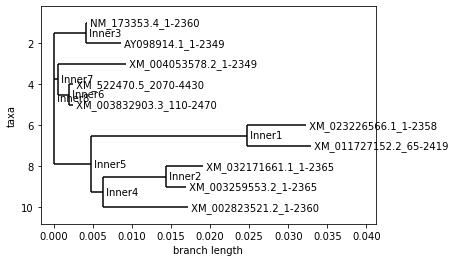

In [45]:
### from Bio import Phylo
import pylab
#draw the tree
Phylo.draw(upgma_tree3)